## Group members and Contributions

Pournima Bhosale : Data Visualization, Documentation <br>
Atharv Patole : Data set selection, data preprocessing,data cleaning, Documentation<br>

Esha Bawaskar : Decision tree, Naive Bayes, Documentation <br>
Rohan Bawa  : ROC curve, SHAP plot<br>
Srujal Shinde : KFold cross validation , Documentaion<br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
import sklearn
import plotly.express as ex

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/healthcare_dataset.csv")
df.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,11/17/2022,6/1/2023,1/9/2019,5/2/2020,7/9/2021
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.98336,47304.06485,36874.897,23303.32209,18086.34418


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
df.isna().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [ ]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112565,299.000000
75%,68.000000,37733.913725,400.000000
max,85.000000,49995.902280,500.000000


In [ ]:
df.shape

(10000, 15)

# Histogram

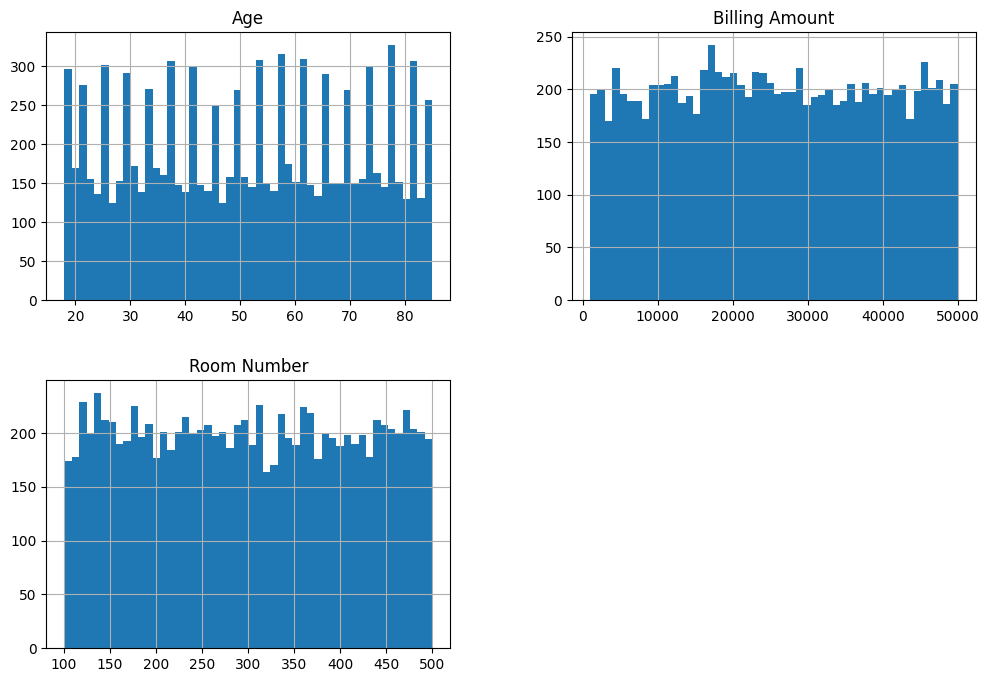

In [ ]:
#Histogram
df.hist(bins=50,figsize=(12,8))
plt.show()

In [ ]:
# categorical features

df.describe(include=['O'])

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,4/12/2019,Michael Johnson,Smith PLC,Cigna,Urgent,11/28/2021,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


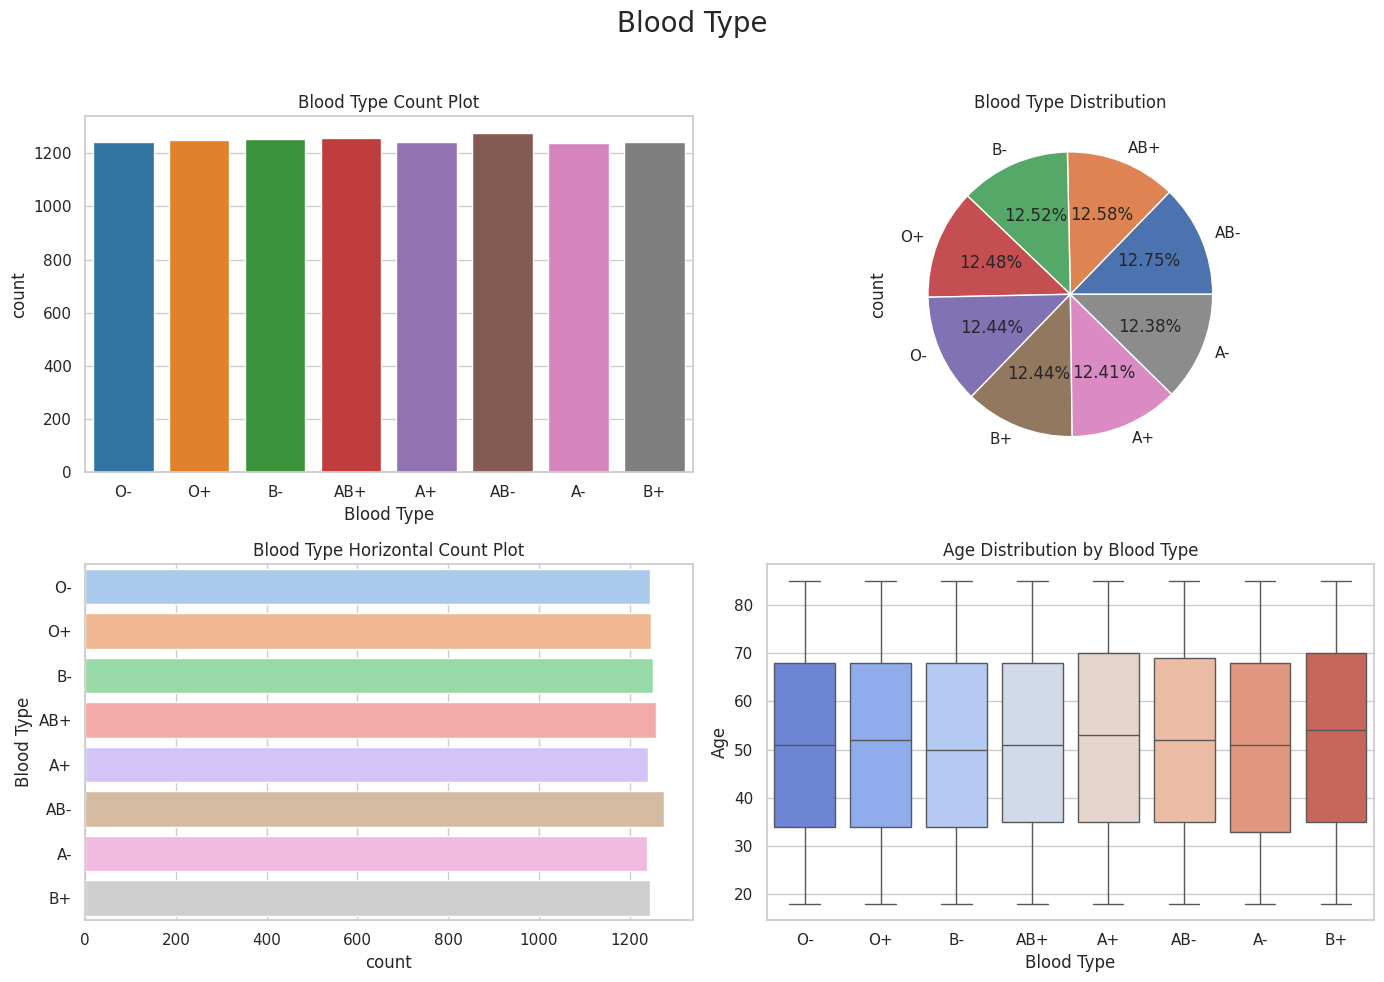

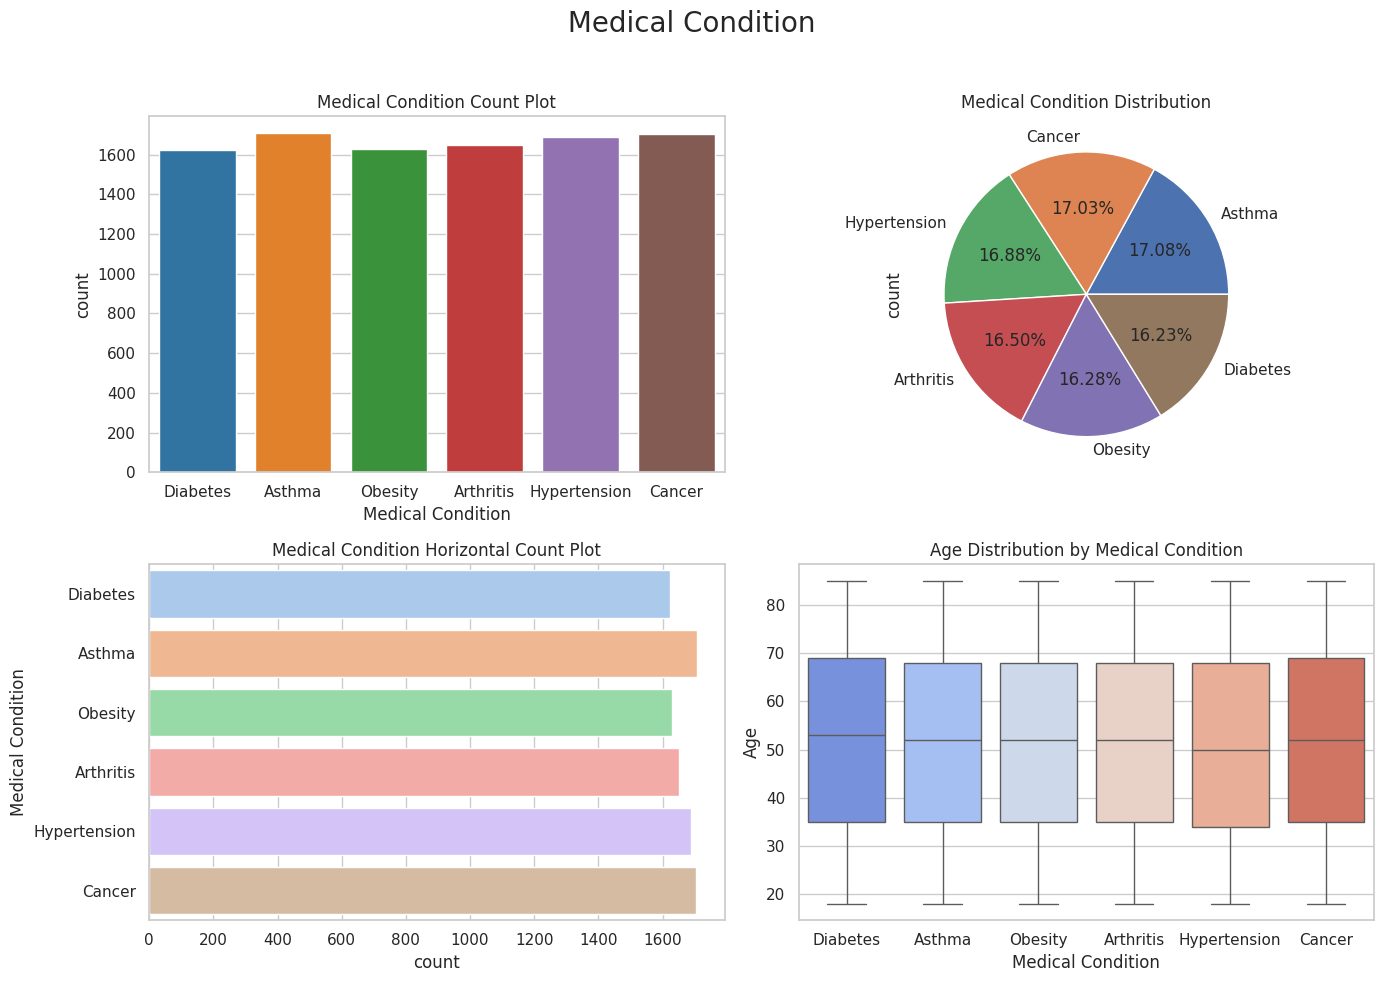

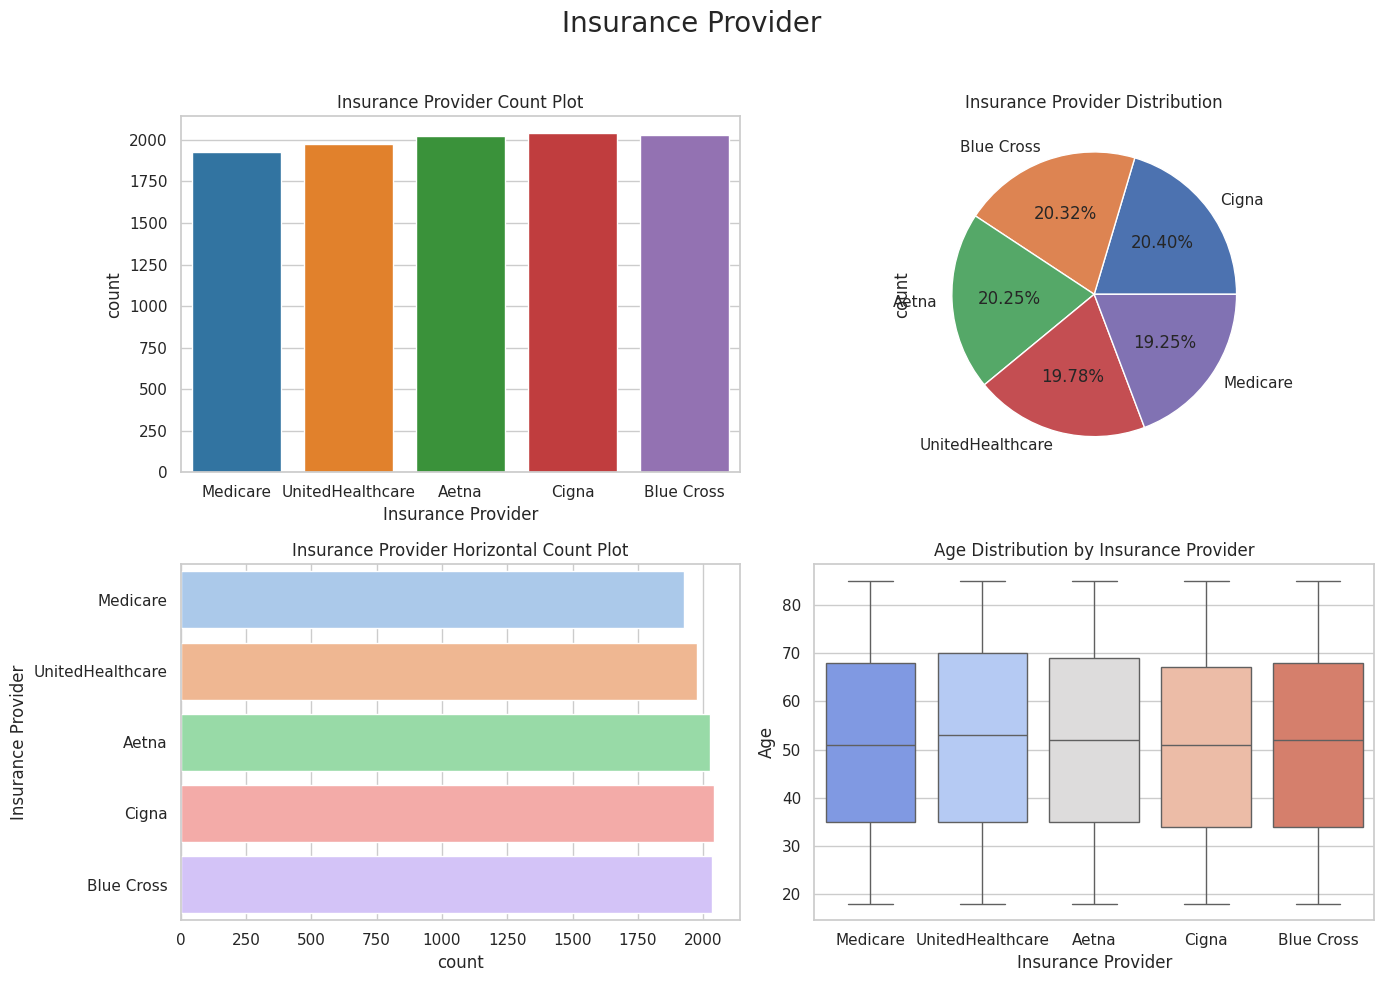

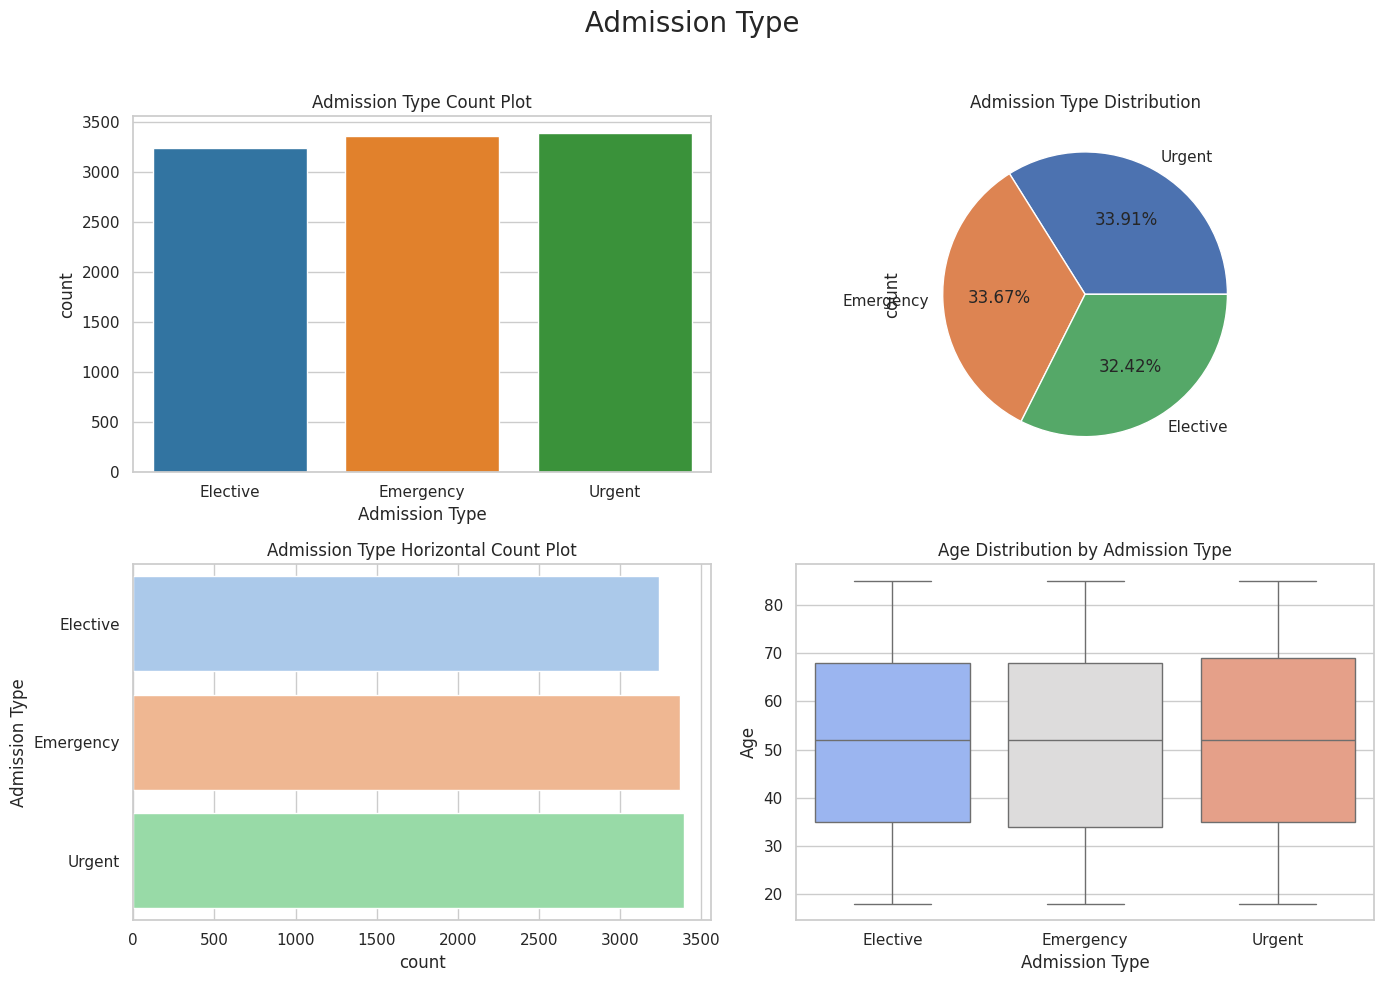

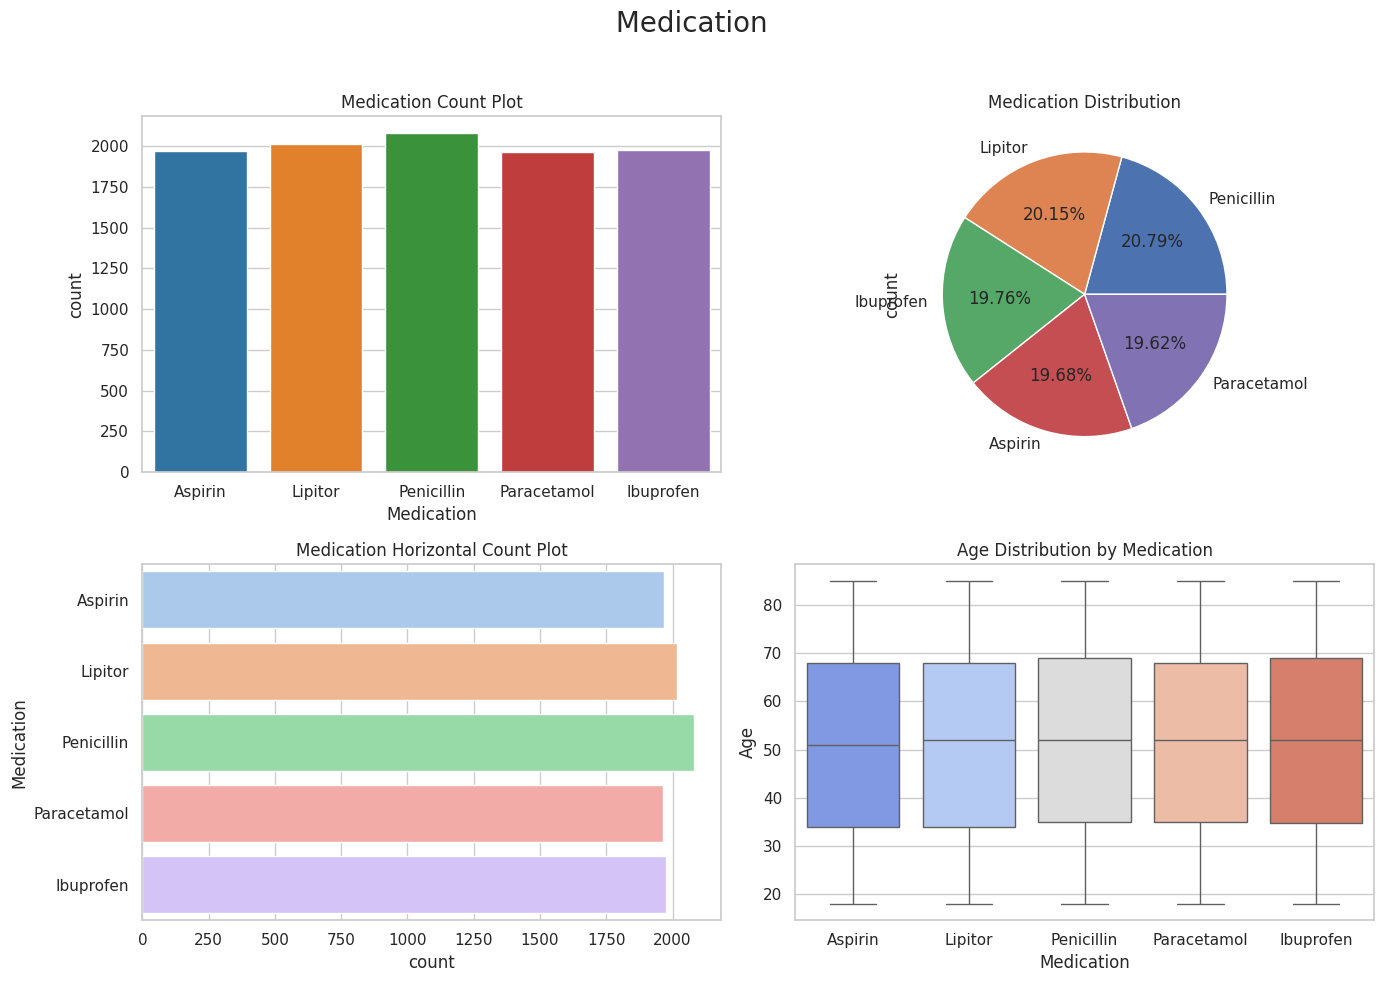

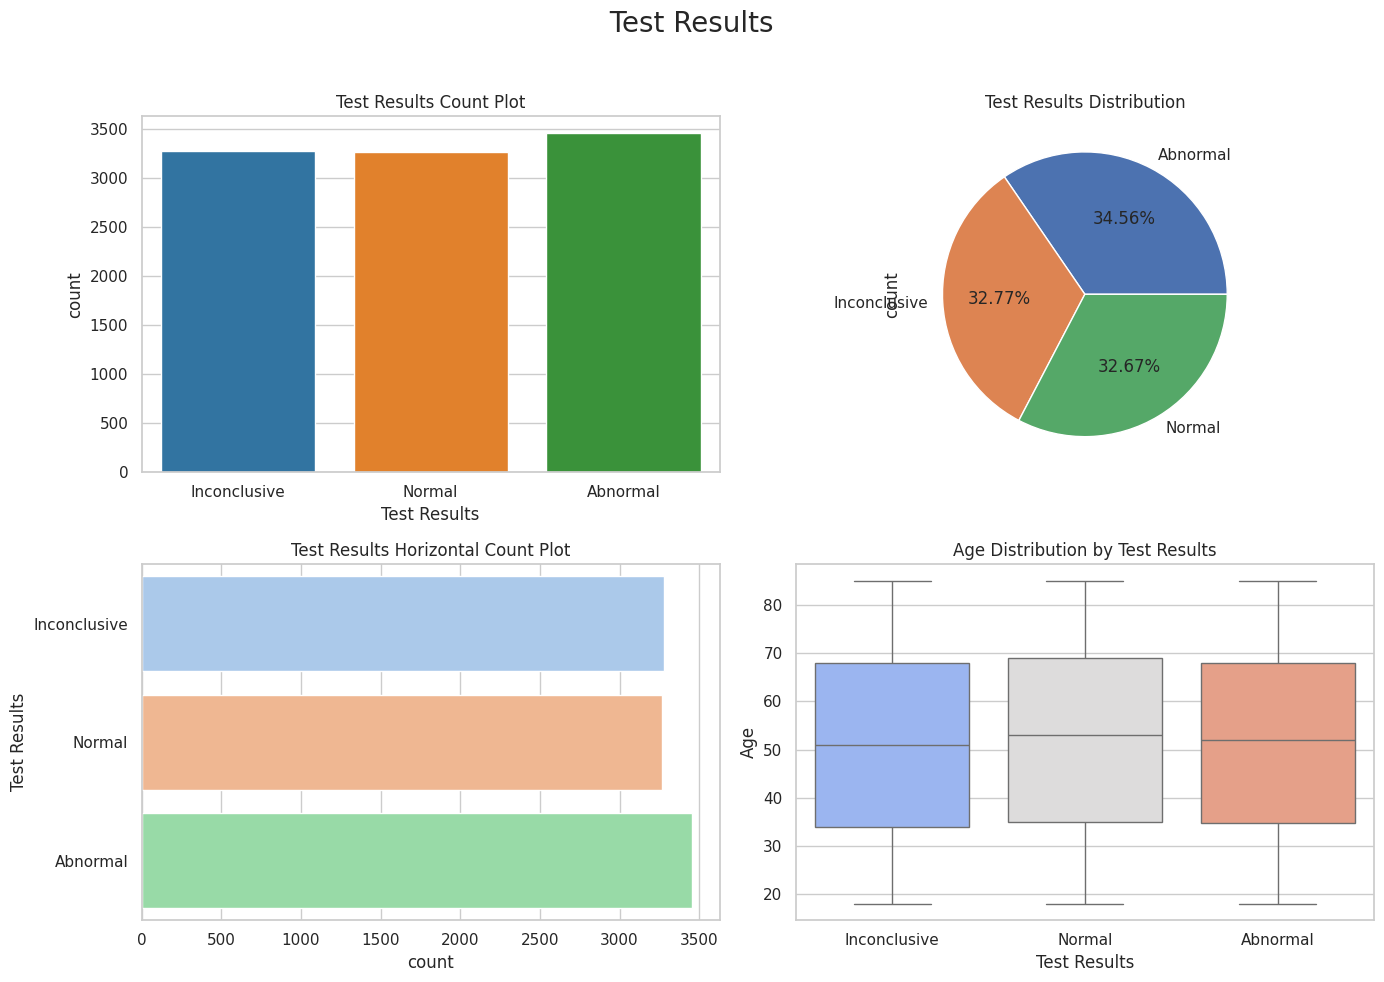

In [ ]:


# Columns to visualize
cols = [ 'Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

# Set Seaborn style
sns.set(style="whitegrid")

# Create visualizations
for col in cols:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f' {col} ', fontsize=20)

    # Bar plot
    sns.countplot(data=df, x=col, ax=axes[0, 0], palette="tab10")
    axes[0, 0].set_title(f'{col} Count Plot')

    # Pie chart
    df[col].value_counts().plot(kind='pie', autopct="%.2f%%", ax=axes[0, 1])
    axes[0, 1].set_title(f'{col} Distribution')

    # Horizontal bar plot
    sns.countplot(data=df, y=col, ax=axes[1, 0], palette="pastel")
    axes[1, 0].set_title(f'{col} Horizontal Count Plot')

    # Box plot for Age by category
    sns.boxplot(data=df, x=col, y='Age', ax=axes[1, 1], palette="coolwarm")
    axes[1, 1].set_title(f'Age Distribution by {col}')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


# KFold

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Select features and target variable
X = df[['Age', 'Gender', 'Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type', 'Medication']]
y = df['Test Results']

# Encode categorical variables
encoder = LabelEncoder()
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition',
                    'Insurance Provider', 'Admission Type', 'Medication']

# Apply encoding to categorical features
X[categorical_cols] = X[categorical_cols].apply(encoder.fit_transform)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the processed data
X.head(), y.head()


(   Age  Gender  Blood Type  Medical Condition  Insurance Provider  \
 0   81       0           7                  3                   3   
 1   35       1           6                  1                   4   
 2   61       1           5                  5                   3   
 3   49       1           5                  1                   3   
 4   51       1           7                  0                   4   
 
    Admission Type  Medication  
 0               0           0  
 1               1           2  
 2               1           2  
 3               2           4  
 4               2           3  ,
 0    Inconclusive
 1          Normal
 2          Normal
 3        Abnormal
 4          Normal
 Name: Test Results, dtype: object)

## Train, Test data and Evaluation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict,train_test_split,GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize models
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()

# Perform K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Function to evaluate and print metrics
def evaluate_model(model, X, y, model_name):
    y_pred = cross_val_predict(model, X, y, cv=kf)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred, target_names=y.unique())
    print(f"** {model_name} Evaluation **")
    print(f"Accuracy: {accuracy:.2f}\n")
    print(report)

# Evaluate models
evaluate_model(dt_model, X_scaled, y, "Decision Tree")
evaluate_model(nb_model, X_scaled, y, "Naïve Bayes")


** Decision Tree Evaluation **
Accuracy: 0.34

              precision    recall  f1-score   support

Inconclusive       0.35      0.35      0.35      3456
      Normal       0.32      0.32      0.32      3277
    Abnormal       0.34      0.34      0.34      3267

    accuracy                           0.34     10000
   macro avg       0.34      0.34      0.34     10000
weighted avg       0.34      0.34      0.34     10000

** Naïve Bayes Evaluation **
Accuracy: 0.33

              precision    recall  f1-score   support

Inconclusive       0.34      0.63      0.44      3456
      Normal       0.30      0.15      0.20      3277
    Abnormal       0.33      0.20      0.25      3267

    accuracy                           0.33     10000
   macro avg       0.32      0.33      0.30     10000
weighted avg       0.32      0.33      0.30     10000



## Tuning Decision tree

In [ ]:
# Define parameter grids for tuning
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV for Decision Tree
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_scaled, y)

# Best parameters and evaluation
best_dt_model = dt_grid.best_estimator_
evaluate_model(best_dt_model, X_scaled, y, "Tuned Decision Tree")



** Tuned Decision Tree Evaluation **
Accuracy: 0.34

              precision    recall  f1-score   support

Inconclusive       0.34      0.38      0.36      3456
      Normal       0.32      0.32      0.32      3277
    Abnormal       0.34      0.31      0.32      3267

    accuracy                           0.34     10000
   macro avg       0.34      0.33      0.33     10000
weighted avg       0.34      0.34      0.33     10000



## Data cleaning Imputation

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
import pandas as pd

# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Use Label Encoding for simplicity
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Encode categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode all categorical variables
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Detect and remove outliers using Z-score
from scipy.stats import zscore

df_cleaned = df_imputed[(zscore(df_imputed.select_dtypes(include=['float', 'int'])) < 3).all(axis=1)]

# Feature Engineering Example
df_cleaned['Risk_Factor'] = df_cleaned['Age'] * df_cleaned['Medical Condition']



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define features (X) and target (y)
X = df_cleaned.drop('Test Results', axis=1)
y = df_cleaned['Test Results']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)

# Check the transformed data shape
print("Transformed Feature Shape:", X_reduced.shape)


Transformed Feature Shape: (10000, 5)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Randomized Search for hyperparameter tuning
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_grid, n_iter=10, cv=5,
    scoring='accuracy', random_state=42
)
random_search.fit(X_reduced, y)

# Save the best model
best_rf_model = random_search.best_estimator_

# Model Evaluation
y_pred = best_rf_model.predict(X_reduced)

# Check model performance
print("Best Model Parameters:", random_search.best_params_)


Best Model Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}


## SHAP Plot

100%|===================| 29988/30000 [31:24<00:00]       

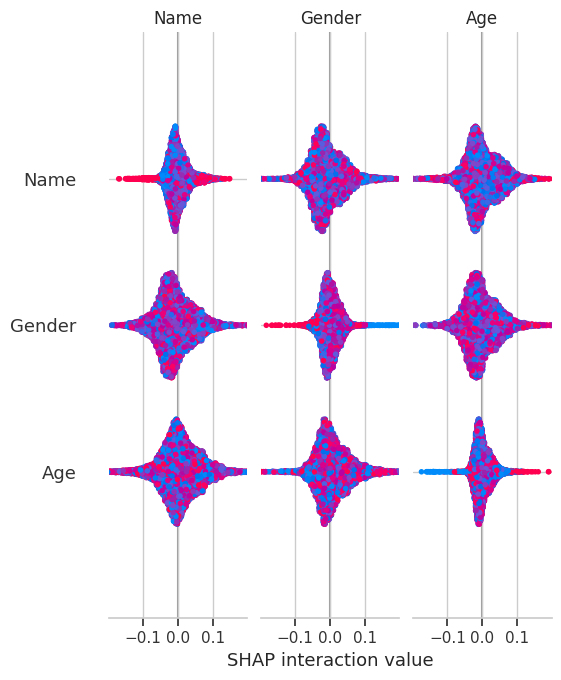

In [ ]:
import shap

# Explainability with SHAP
explainer = shap.Explainer(best_rf_model, X_reduced)
shap_values = explainer(X_reduced)

# Summary plot
shap.summary_plot(shap_values, X_reduced, feature_names=df_cleaned.columns[:-1])


## ROC Curve for Multi-Class Classification

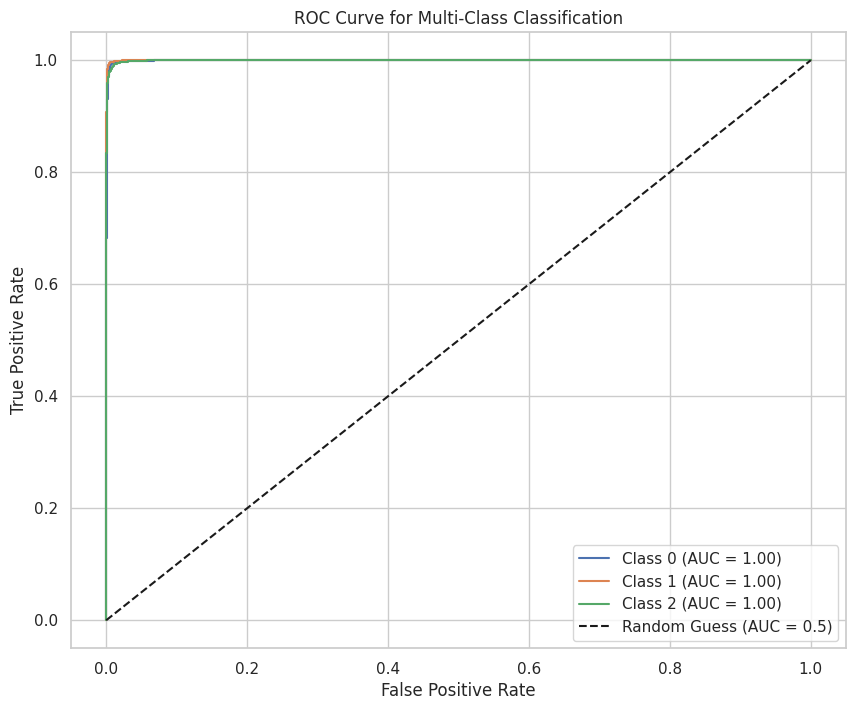

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Binarize the target labels
y_binarized = label_binarize(y, classes=sorted(y.unique()))

# Train a One-vs-Rest Classifier (if not already trained)
ovr_model = OneVsRestClassifier(best_rf_model)
ovr_model.fit(X_reduced, y_binarized)

# Generate predictions and probabilities
y_score = ovr_model.predict_proba(X_reduced)

# Compute ROC curve and AUC for each class
n_classes = y_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

# Plot the ROC Curve for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot each class's ROC
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
